# **1. Perkenalan Dataset**


Dataset ini berasal dari IBM Telco Customer Churn. Dataset ini berisi informasi pelanggan layanan telekomunikasi untuk memprediksi apakah pelanggan berhenti (Churn) atau tetap berlangganan. Dataset terdiri dari 7043 baris dengan 21 fitur seperti usia pelanggan layanan, jenis kontrak, pembayaran, durasi berlangganan, dan biaya bulanan. Kolom target bernama “Churn” dengan nilai Yes dan No.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import sparse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
data = "https://drive.google.com/uc?id=1xfRILLfyKupZljJ_xo2y6s321H_Tb7z0"
df = pd.read_csv(data)
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

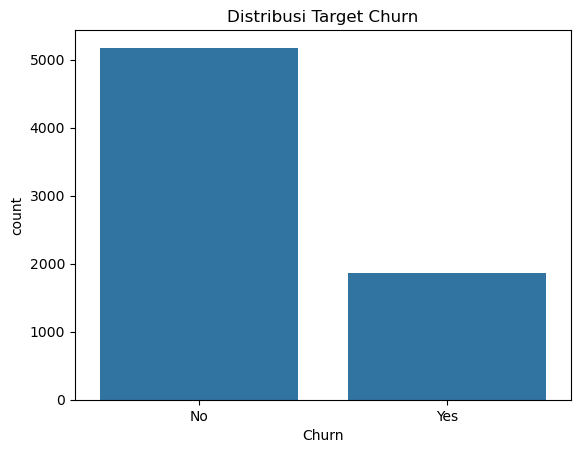

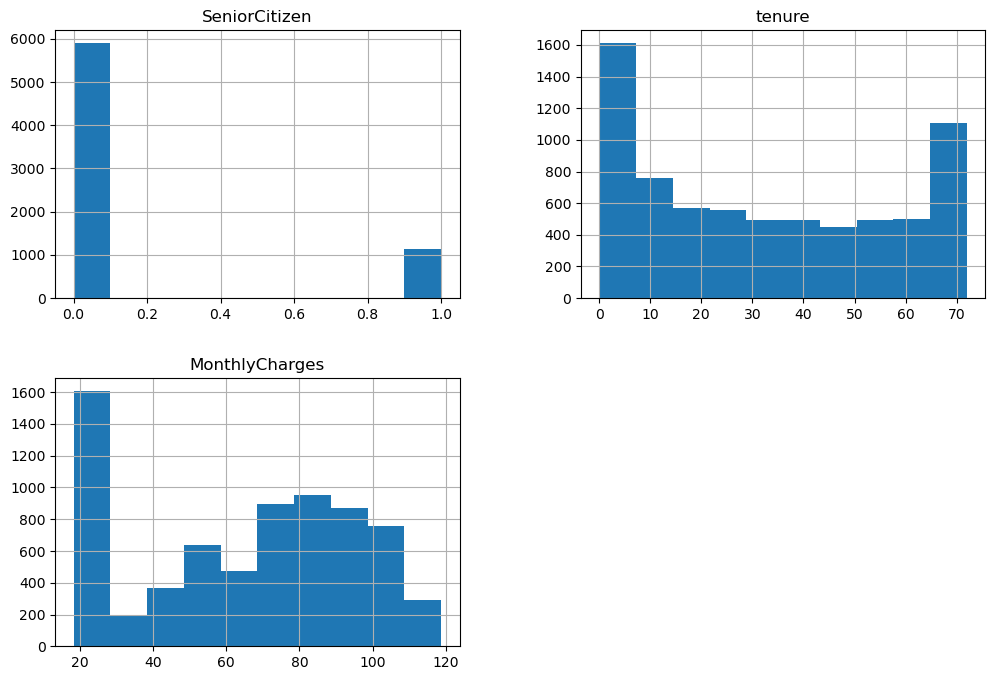

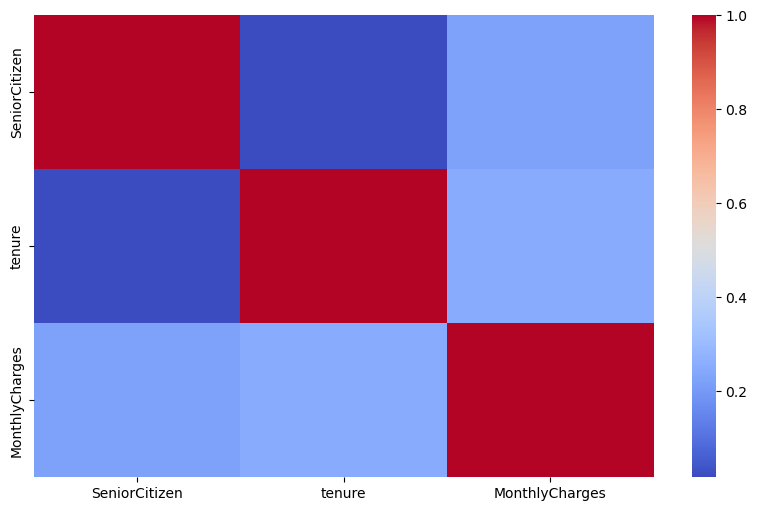

In [5]:
#periksa banyak kolom dan baris
df.shape

#periksa missing value
df.isnull().sum()


#distribusi target
sns.countplot(x=df['Churn'])
plt.title("Distribusi Target Churn")
plt.show()


#histogram fitur numerik
df.hist(figsize=(12,8))
plt.show()


#korelasi numerik
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [6]:
# target
target_col = 'Churn'

# convert yes/ no -> 1/ 0
df[target_col] = df[target_col].map({'Yes':1, 'No':0})
X = df.drop(columns=[target_col])
y = df[target_col]


# memisahkan numerik dan kategori
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(exclude=['int64','float64']).columns


# Pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# split train-valid-test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)


# transform
X_train_proc = preprocessor.fit_transform(X_train)
X_valid_proc = preprocessor.transform(X_valid)
X_test_proc  = preprocessor.transform(X_test)


In [7]:

# Folder output
base_dir = "/content/drive/MyDrive/Eksperimen_SML/preprocessing"
output_dir = os.path.join(base_dir, "TelcoChurn_preprocessing")
os.makedirs(output_dir, exist_ok=True)

def to_dense(arr):
    return arr.toarray() if sparse.issparse(arr) else arr

train_data = np.hstack([to_dense(X_train_proc), y_train.to_numpy().reshape(-1,1)])
valid_data = np.hstack([to_dense(X_valid_proc), y_valid.to_numpy().reshape(-1,1)])
test_data  = np.hstack([to_dense(X_test_proc),  y_test.to_numpy().reshape(-1,1)])

pd.DataFrame(train_data).to_csv(os.path.join(output_dir, "train.csv"), index=False)
pd.DataFrame(valid_data).to_csv(os.path.join(output_dir, "valid.csv"), index=False)
pd.DataFrame(test_data ).to_csv(os.path.join(output_dir, "test.csv"), index=False)

print("Preprocessing selesai ✔")
print("File tersimpan di:")
print(output_dir)


Preprocessing selesai ✔
File tersimpan di:
/content/drive/MyDrive/Eksperimen_SML/preprocessing\TelcoChurn_preprocessing
